In [1]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
all_reviews = []

with open('reviews_texts.txt') as f:
    for json_text in f:
        json_string = json.loads(json_text)
        
        url = json_string['url']
        temp = url.split(':')
        url = temp[1][2:]
        
        cat3 = json_string['cat3']
        cat4 = json_string['cat4']
                        
        current_json = {'url': url, 'cat3': cat3, 'cat4': cat4}

        all_reviews.append(current_json)

In [3]:
all_reviews[0:5]

[{'url': 'otzovik.com/review_2852282.html',
  'cat3': 'Витамины и микроэлементы',
  'cat4': 'Фармстандарт'},
 {'url': 'otzovik.com/review_1924506.html',
  'cat3': 'Противоаллергические средства',
  'cat4': 'Schering-Plough'},
 {'url': 'otzovik.com/review_1357179.html',
  'cat3': 'Обезболивающие',
  'cat4': 'Биосинтез'},
 {'url': 'otzovik.com/review_1732619.html',
  'cat3': 'Витамины и микроэлементы',
  'cat4': 'Верваг Фарма'},
 {'url': 'otzovik.com/review_4043321.html',
  'cat3': 'Гастроэнтерологические препараты',
  'cat4': 'Европа-Биофарм'}]

In [4]:
all_urls = []

with open('urls.txt') as f:
    for url in f: 
        url = url.replace('\n', '')
        temp = url.split(':')
        all_urls.append(temp[1][2:])

In [5]:
all_urls[0:5]

['otzovik.com/review_1000239.html',
 'otzovik.com/review_1001267.html',
 'otzovik.com/review_1004574.html',
 'otzovik.com/review_1004580.html',
 'otzovik.com/review_1007072.html']

#### Нахождение отзывов по url

In [6]:
found_reviews = []

for review in all_reviews:
    for url in all_urls:
        if review['url'] == url:
            found_reviews.append(review)    

In [7]:
found_reviews[0:4]

[{'url': 'otzovik.com/review_2397151.html',
  'cat3': 'Иммуномодуляторы',
  'cat4': 'Пептек'},
 {'url': 'otzovik.com/review_1361744.html',
  'cat3': 'Ноотропные препараты',
  'cat4': 'Пантогам'},
 {'url': 'otzovik.com/review_1357098.html',
  'cat3': 'Противовирусные препараты',
  'cat4': 'Валента Фармацевтика'},
 {'url': 'otzovik.com/review_2304136.html',
  'cat3': 'Противовирусные препараты',
  'cat4': 'Лекфарм'}]

In [8]:
len(all_reviews)

157943

In [9]:
len(all_urls)

2801

In [10]:
len(found_reviews)

1226

#### Статистика

In [11]:
cat3 = Counter()
cat4 = Counter()

for review in found_reviews:
    cat3[review['cat3']] += 1
    cat4[review['cat4']] += 1

In [12]:
cat3.most_common(5)

[('Противовирусные препараты', 684),
 ('Снотворные и успокаивающие препараты', 301),
 ('Иммуномодуляторы', 128),
 ('Ноотропные препараты', 112),
 ('Антидепрессанты', 1)]

In [13]:
cat4.most_common(100)

[('Валента Фармацевтика', 89),
 ('Фармстандарт', 57),
 ('Фармак', 52),
 ('Materia Medica', 38),
 ('Ферон', 33),
 ('Экофарм', 31),
 ('Биокад', 24),
 ('Изопринозин', 23),
 ('Gedeon Richter', 20),
 ('ФармВилар', 20),
 ('Биофарма', 19),
 ('Novartis', 19),
 ('UPSA', 18),
 ('Киевский витаминный завод', 16),
 ('Sandoz', 15),
 ('ФИРН М', 13),
 ('Аквалор', 13),
 ('Биотики', 12),
 ('Белмедпрепараты', 12),
 ('Nycomed', 11),
 ('Микроген', 11),
 ('Пептек', 10),
 ('Татхимфармпрепараты', 10),
 ('UCB Pharma S.A.', 10),
 ('Петровакс Фарм', 10),
 ('Дальхимфарм', 9),
 ('Нижфарм', 9),
 ('Synthelabo Groupe', 9),
 ('Гриндекс', 9),
 ('Helpex', 9),
 ('Зеленая дубрава', 9),
 ('GlaxoSmithKline', 9),
 ('Внешторг Фарма', 9),
 ('Медика', 9),
 ('Полисан', 9),
 ('Герофарм', 9),
 ('Пантогам', 8),
 ('Nobel', 8),
 ('Nabros Pharma', 8),
 ('Nasaleze', 8),
 ('Doppel Farmaceutici', 8),
 ('Энцефабол', 8),
 ('Марбиофарм', 8),
 ('ИнтерХим', 7),
 ('Natur Produkt', 7),
 ('Дарница', 7),
 ('Ди Аш Ю', 7),
 ('Минскинтеркапс', 7),
 

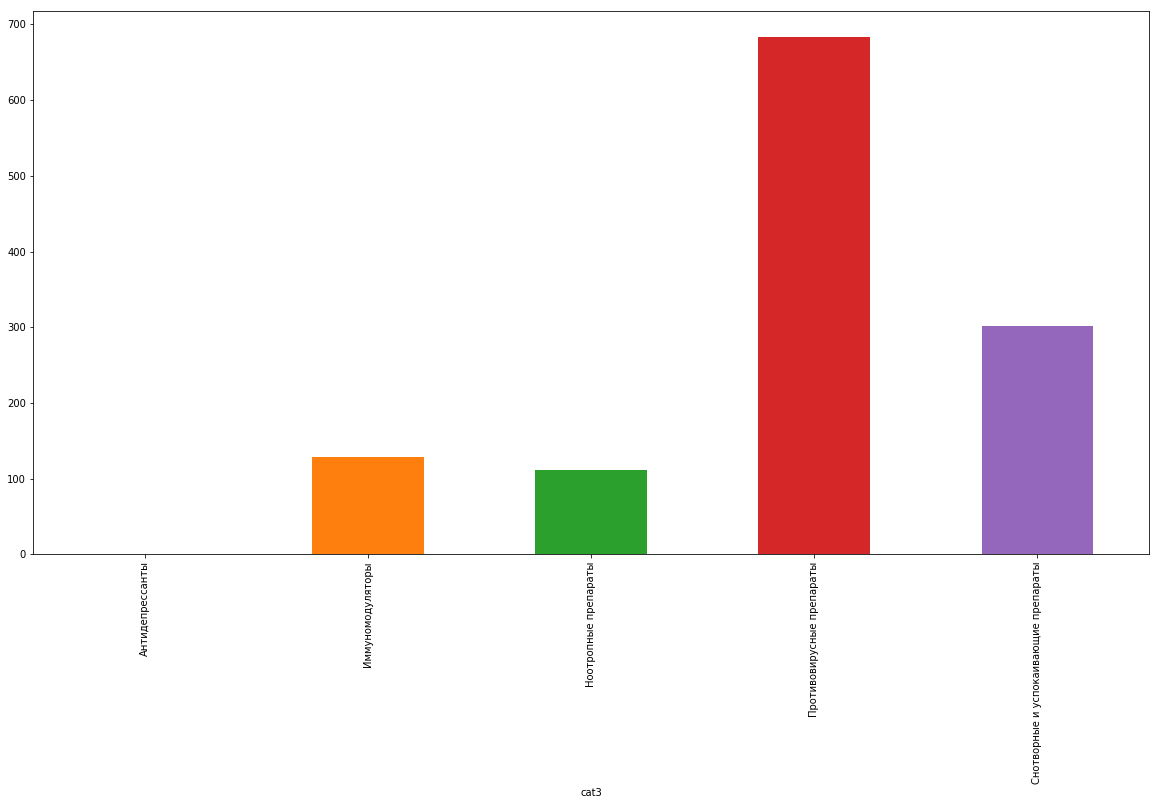

In [14]:
cat3_found_reviews = pd.DataFrame(found_reviews).groupby('cat3').size()
plt.figure(figsize=(20,10))
cat3_found_reviews.plot(kind='bar')
plt.savefig('cat3_found_reviews.png', bbox_inches='tight')

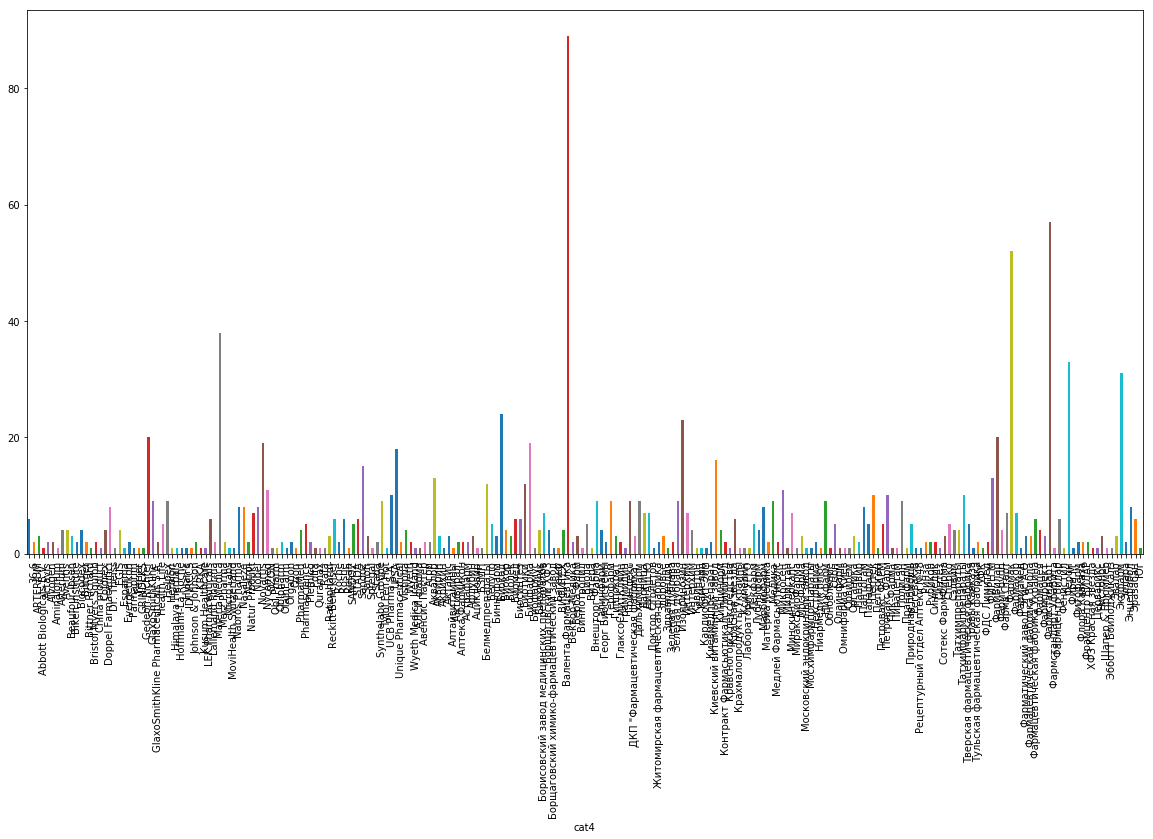

In [15]:
cat4_found_reviews = pd.DataFrame(found_reviews).groupby('cat4').size()
plt.figure(figsize=(20,10))
cat4_found_reviews.plot(kind='bar')
plt.savefig('cat4_found_reviews.png', bbox_inches='tight')